In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pylab as pyl
import time
import cvxpy as cp
from numpy import linalg as Lin
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn import datasets

import warnings

warnings.filterwarnings('ignore')


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def distmat(x,y):
    
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)


In [3]:
def plotp(plt, x, col, scale=200, edgecolors="k"):
  return plt.scatter(x[0,:], x[1,:], s=scale, edgecolors=edgecolors,  c=col, cmap='plasma', linewidths=2)

In [4]:
normalize = lambda a: a/np.sum(a)

In [5]:
def getSinkhornP(u,K,v):
    return u*K*(v.T)

### Functions to Generate data points

In [6]:
from sklearn.cluster import KMeans

In [7]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [8]:
def randomsampledata(N):
  x=[]
  y=[]
  for i in range(len(N)):
    x.append(np.random.rand(2,N[i])-0.5)
    theta=2*np.pi*np.random.rand(1,N[i])
    r =0.8+0.2*np.random.rand(1,N[i])
    y.append(np.vstack((np.cos(theta)*r,np.sin(theta)*r)))
  
  return x,y

In [9]:
def clusteredsampling(N):
  x_sample=[]
  y_sample=[]
  label_x=[]
  label_y=[]
  N=np.sort(N)
  x=np.random.rand(2,N[-1])-0.5
  theta=2*np.pi*np.random.rand(1,N[-1])
  r =0.8+0.2*np.random.rand(1,N[-1])
  y=np.vstack((np.cos(theta)*r,np.sin(theta)*r))
  x_sample.append(x.T)
  y_sample.append(y.T)
  n=len(N)
  for i in range(n-1,0,-1):
      # if i!=n-1:
      x=x_sample[-1]
      y=y_sample[-1]
      # N[i-1]=4, x resolution =16
      kmeans_x = KMeans(n_clusters=N[i-1], random_state=i).fit(x)
      kmeans_y = KMeans(n_clusters=N[i-1], random_state=i).fit(y)
      center_x=kmeans_x.cluster_centers_
      center_y=kmeans_y.cluster_centers_
      label_x.append(kmeans_x.labels_)
      label_y.append(kmeans_y.labels_)
      x_sample.append(center_x)
      y_sample.append(center_y)
  
  return x_sample[::-1],y_sample[::-1],label_x[::-1],label_y[::-1],N

In [10]:
#N=[200,400,600,800,1000]
N=[4, 16, 64, 256, 1024, 4096]
x,y,label_x,label_y,N=clusteredsampling(N)

In [11]:
for i in label_x:
  print((len(i),i))

(16, array([0, 3, 1, 2, 3, 0, 3, 0, 1, 2, 3, 0, 2, 1, 2, 1], dtype=int32))
(64, array([ 9,  0,  2, 10, 14, 12, 15, 11, 13,  1,  9,  3,  5,  4,  8,  3,  6,
        9,  7,  0,  2, 10, 13, 14,  4,  0, 12,  5, 13,  8,  7,  3, 12,  3,
        9,  6,  1, 14,  2, 11,  5,  7, 13,  1, 11,  4,  4, 11,  8,  7,  6,
       10,  4,  2, 15,  5, 12,  0,  2,  0,  3, 10, 15,  5], dtype=int32))
(256, array([63, 48, 31, 22, 24,  1, 32, 33, 14, 35, 53,  5, 27,  0, 50, 23, 62,
       55, 13, 42, 21, 47, 34, 58,  4, 37, 41, 43, 26, 22, 60, 52, 62, 59,
       32, 51, 23, 20, 16,  7, 18, 44, 12, 46, 42,  8, 10, 59, 56,  9, 38,
        3, 39,  7, 60, 19,  6, 51, 29, 13, 30, 63,  0, 17, 42, 46, 14, 49,
       53, 19, 23, 11, 21, 31, 61, 55, 47,  4, 15,  0,  8, 31, 29, 30, 50,
       26, 52, 37,  2, 39, 34, 40, 37, 36, 12, 57,  1,  6, 63, 31, 54, 56,
        4, 18, 32, 28, 13, 25, 33,  9, 35, 50, 51, 14, 61, 35, 28, 36, 35,
       38, 48, 47,  5, 40, 22, 11, 22, 49,  2, 45, 52, 59, 39, 10, 17, 29,
       20, 46, 

### Voronoi Plot

In [12]:
from scipy.spatial import Voronoi, voronoi_plot_2d

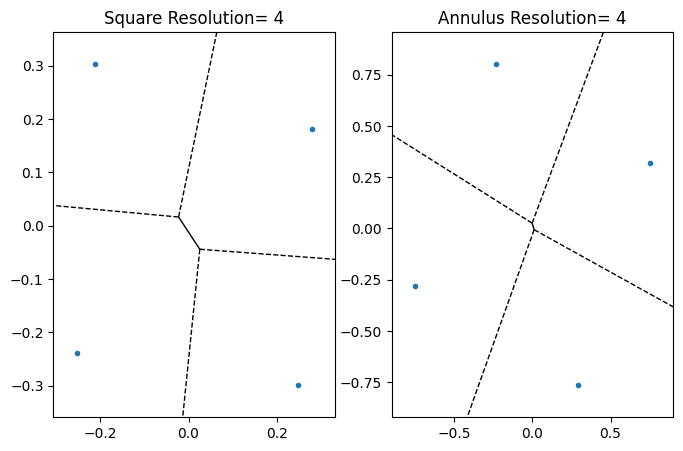

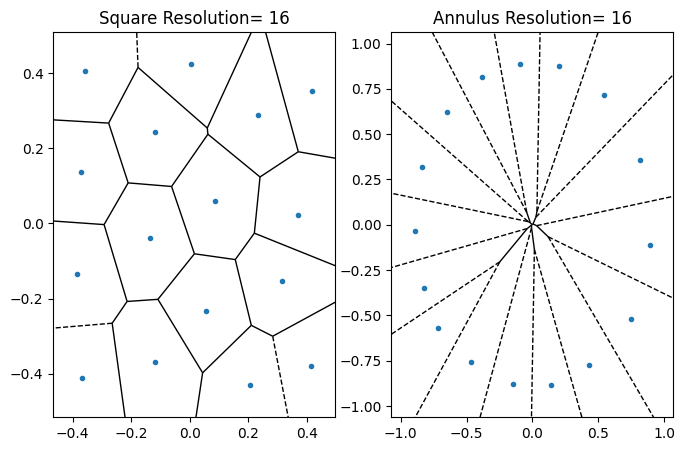

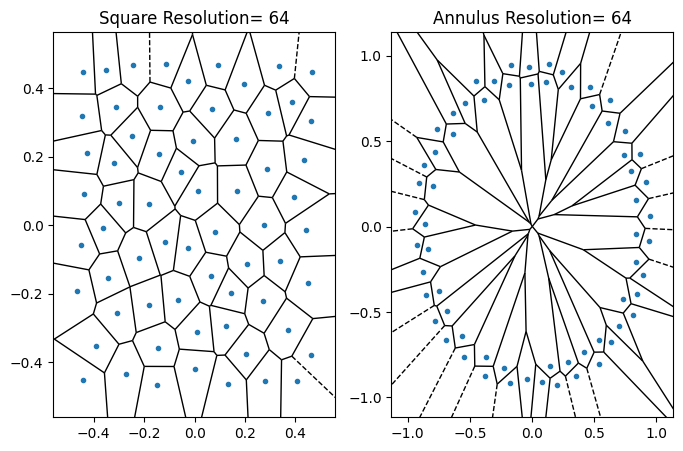

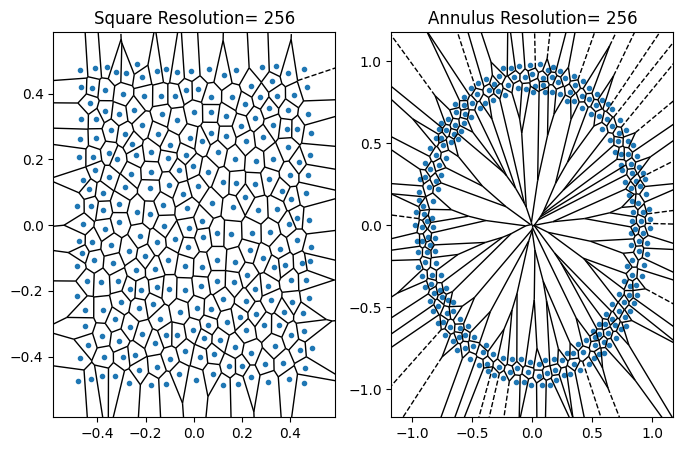

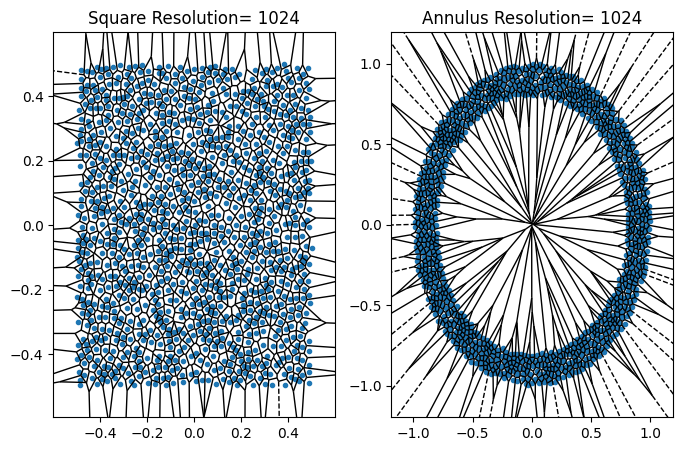

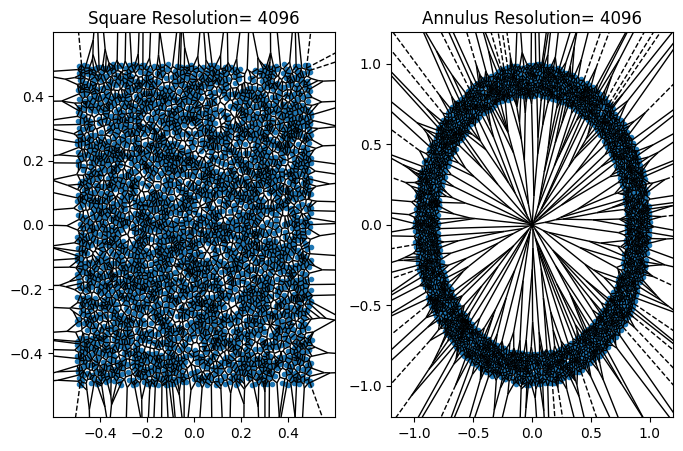

In [13]:
for i in range(len(N)):
  _, (ax1, ax2) = plt.subplots(figsize=(8,5),ncols=2)
  vorx = Voronoi(x[i])
  fig = voronoi_plot_2d(vorx,ax=ax1,show_vertices=False)
  vory = Voronoi(y[i])
  fig = voronoi_plot_2d(vory,ax=ax2,show_vertices=False)
  
  ax1.set_title("Square Resolution= "+str(x[i].shape[0]))
  ax2.set_title("Annulus Resolution= "+str(y[i].shape[0]))
  
  plt.show();


### Inflate Function

In [14]:
def inflate(x,labelpts):
  
  mat=np.zeros((len(labelpts),len(x)))
  for i in range((len(labelpts))):
    mat[i][labelpts[i]]=1
  return np.dot(mat,x)

### Importing Sinkhorn

In [15]:
#from sinkhorn import Sinkhorn
import computational_OT

### Experiment

Sinkhorn.... 
Doing for  4
 |- Iterating


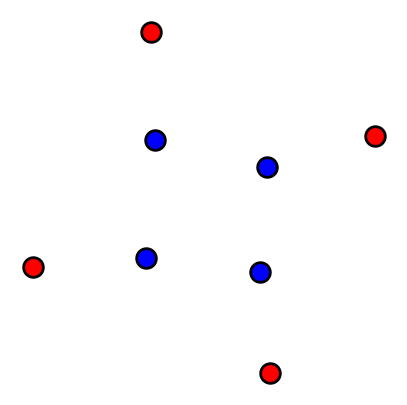

 |- Computing P

Doing for  16
 |- Iterating


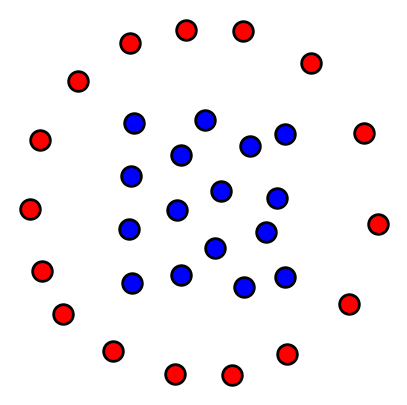

 |- Computing P

Doing for  64
 |- Iterating


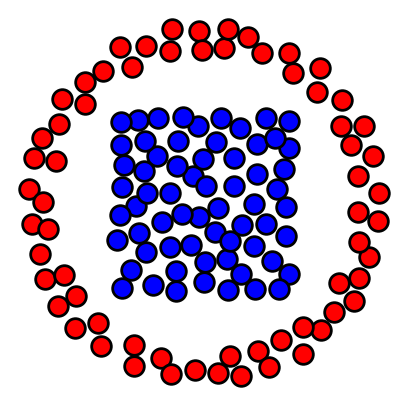

 |- Computing P

Doing for  256
 |- Iterating


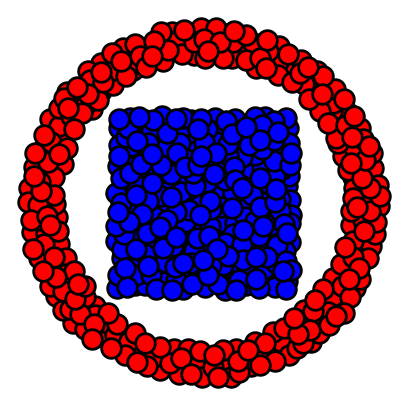

 |- Computing P

Doing for  1024
 |- Iterating


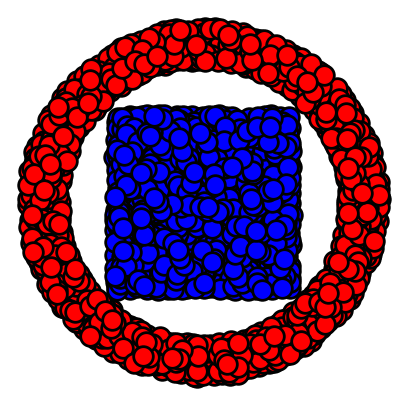

 |- Computing P

Doing for  4096
 |- Iterating


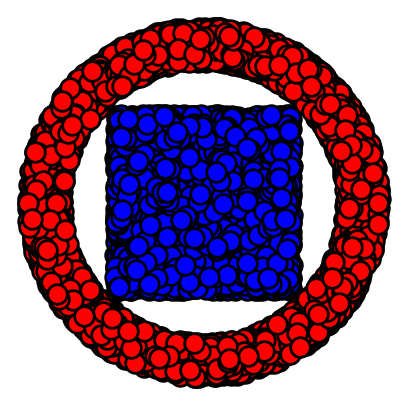

 |- Computing P



In [16]:
epsilons = [0.5, .06, .06, .06, .06, .06]
# Sinkhorn
print("Sinkhorn.... ")
SinkhornP=[]
results_Sinkhorn=[]
times_Sinkhorn=[]
Pmatrix_dist_linVSsinkhorn=[]
finflated=[]
ginflated=[]
multiscale_f=[]
multiscale_g=[]
for i in range(len(N)):

  
  xi,yi=x[i].T,y[i].T
  #Cost matrix
  C = distmat(xi,yi)
  
  # a and b
  a = normalize(np.ones(N[i]))
  a=a.reshape(a.shape[0],-1)
  b = normalize(np.ones(N[i]))
  b=b.reshape(b.shape[0],-1)
  
  #Epsilon
  epsilon = epsilons[i]


  #Kernel
  K=np.exp(-C/epsilon)


  print("Doing for ",N[i])
  print( " |- Iterating")
  plt.figure(figsize=(5,5))

  plotp(plt,xi, 'b')
  plotp(plt,yi, 'r')

  plt.axis("off")
  plt.xlim(np.min(yi[0,:])-.1,np.max(yi[0,:])+.1)
  plt.ylim(np.min(yi[1,:])-.1,np.max(yi[1,:])+.1)

  plt.show()

  #Inflating
  if i ==0:
    u=a
    v=b
  else:
    #Optimized f&g for N-1
    f_coarse=multiscale_f[-1]
    g_coarse=multiscale_g[-1]

    # Inflated f&g to initialise for optimizing for N
    f_inflated=inflate(f_coarse,label_x[i-1])
    finflated.append(f_inflated)
    u=np.exp(f_inflated/epsilon)

    g_inflated=inflate(g_coarse,label_y[i-1])
    ginflated.append(g_inflated)
    v=np.exp(g_inflated/epsilon)
  # end if   
  
  start=time.time()
  Optimizer=computational_OT.Sinkhorn(K,a,b,u,v,epsilon)
  out=Optimizer._update()
  results_Sinkhorn.append(out)
  end=time.time() 
  times_Sinkhorn.append(end-start)
  print( " |- Computing P")
  print( "" )
  SinkhornP.append(getSinkhornP(out[0],K,out[1]))
  # Distance between P matrices of Linear P and Sinkhorn P
  #Pmatrix_dist_linVSsinkhorn.append(np.linalg.norm(SinkhornP[i]-LinearP[i], 'fro'))
  multiscale_f.append(np.log(out[0])*epsilon)  
  multiscale_g.append(np.log(out[1])*epsilon)
#end for

### Convergence Plot

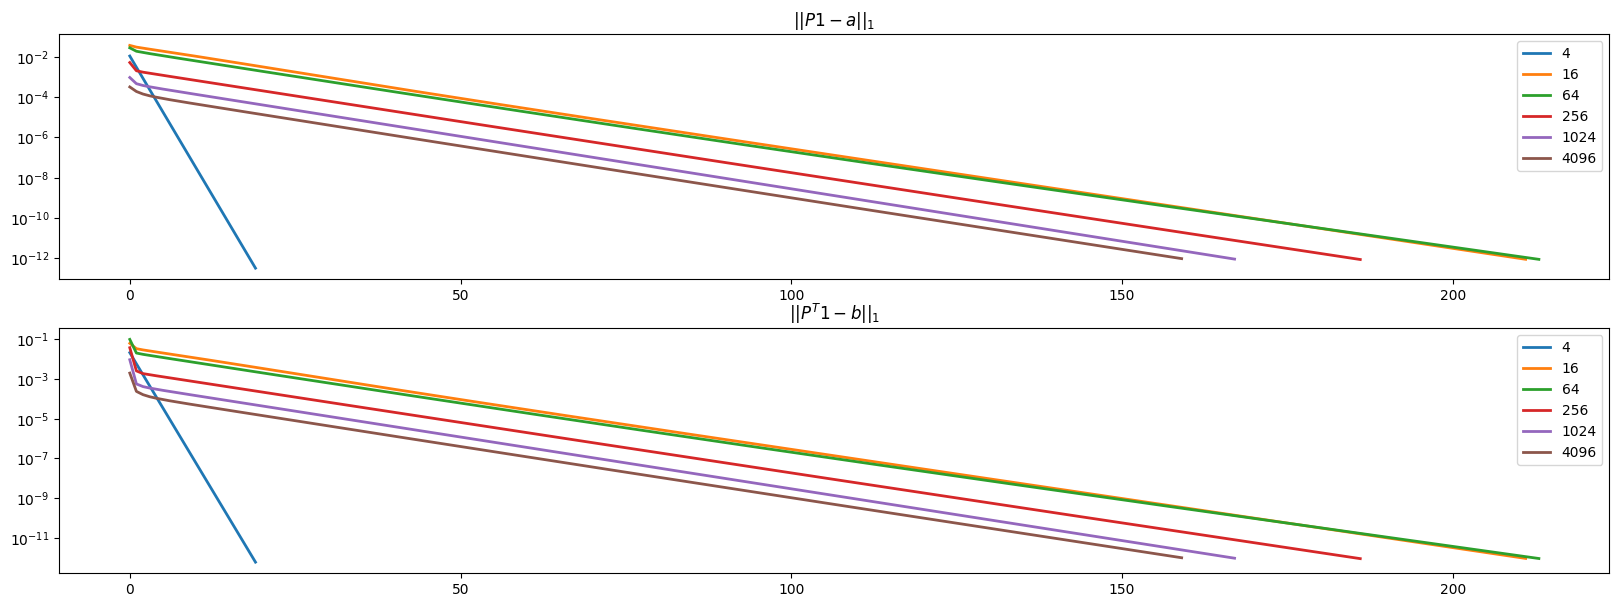

In [17]:

plt.figure(figsize = (20,7))

plt.subplot(2,1,1),
plt.title("$||P1 -a||_1$")
for result in results_Sinkhorn:
  plt.plot( np.asarray(result[2]), linewidth = 2)
plt.yscale( 'log')
plt.legend([str(i) for i in N],loc="upper right")

plt.subplot(2,1,2)
plt.title("$||P^T 1 -b||_1$")
for result in results_Sinkhorn:
  plt.plot( np.asarray(result[3]), linewidth = 2)
plt.yscale( 'log')
plt.legend([str(i) for i in N],loc="upper right")
plt.show()

### Objective Function

In [18]:
targets=[]
penalizations=[]

for result in results_Sinkhorn:
  objective = result[4]
  target = np.asarray( [x for (x,y) in objective] ).flatten()
  penalization = np.asarray( [y for (x,y) in objective] ).flatten()
  targets.append( target )
  penalizations.append( penalization )

plt.figure(figsize = (20,7))
plt.title("$Objectivefunction$")
for target in targets:  
  plt.plot( target, linewidth = 2)
plt.legend([str(i) for i in N],loc="upper right")
plt.show()

plt.figure(figsize = (20,7))
plt.title("$Penalizations$")
for penalization in penalizations:  
  plt.plot( penalization, linewidth = 2)
plt.legend([str(i) for i in N],loc="upper right")
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

### f&g map plots

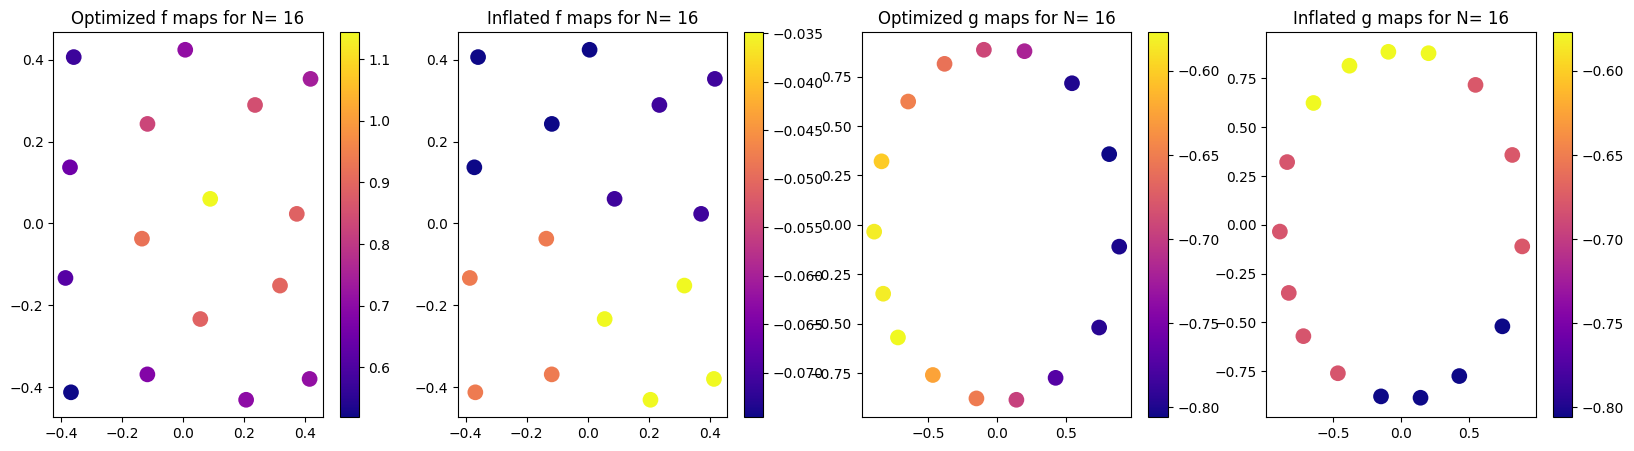

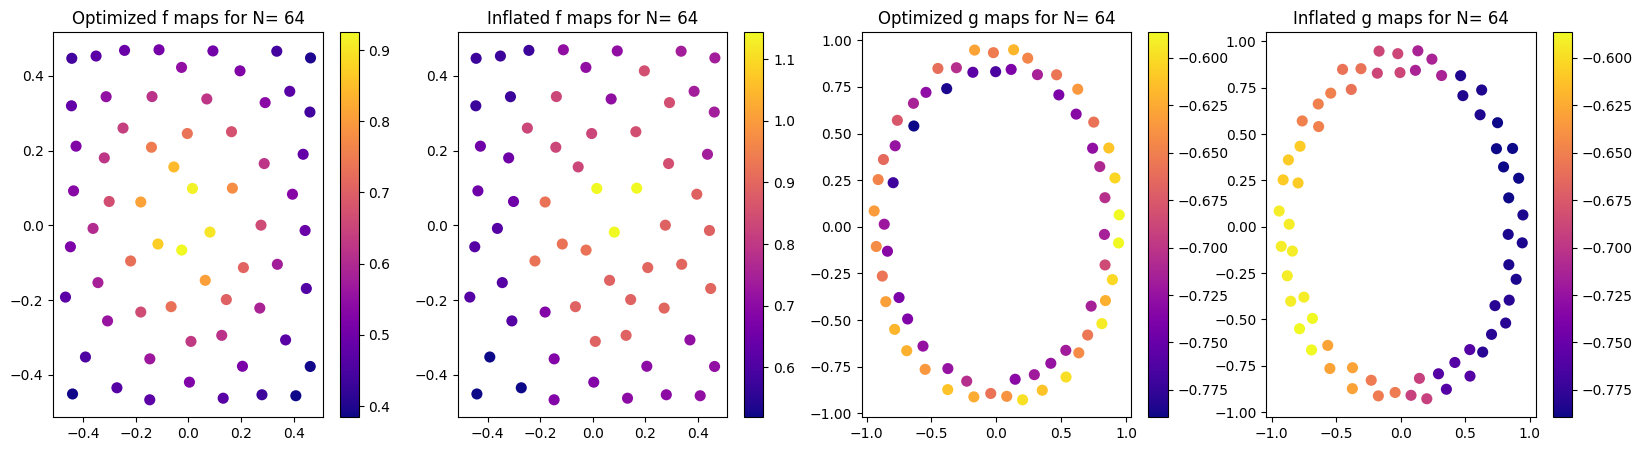

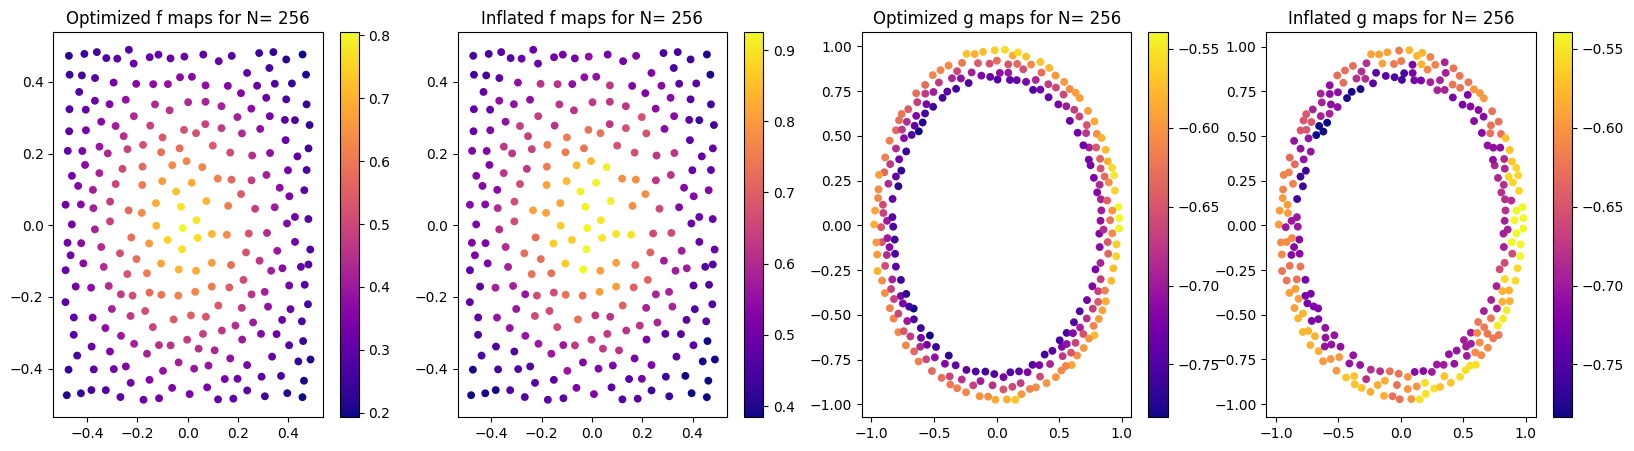

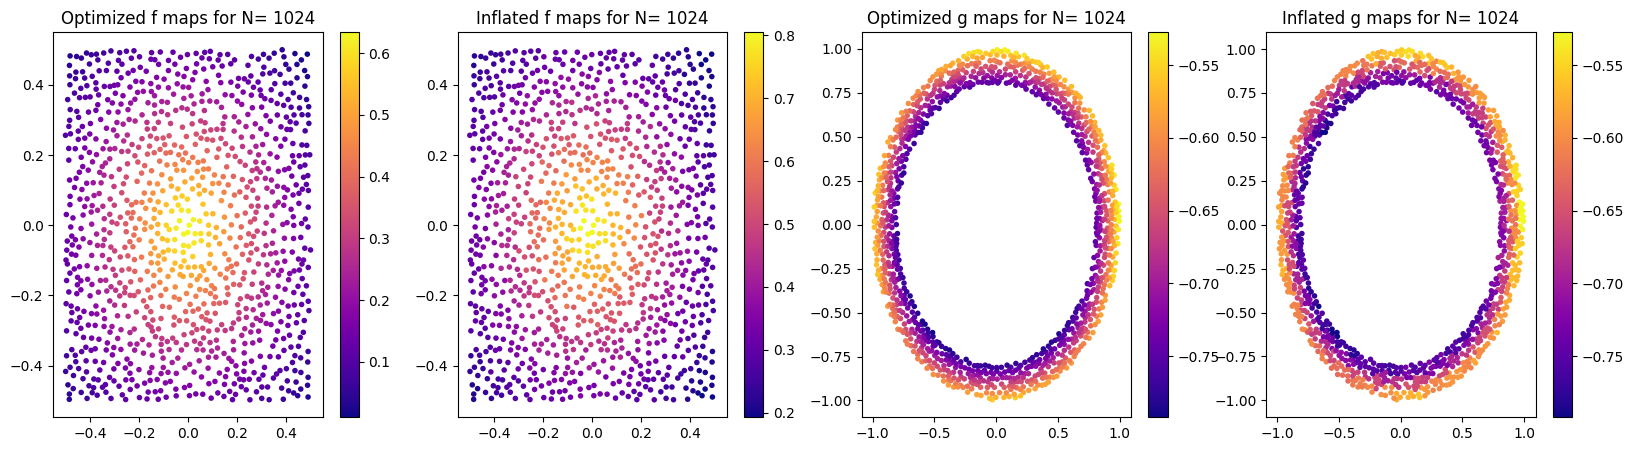

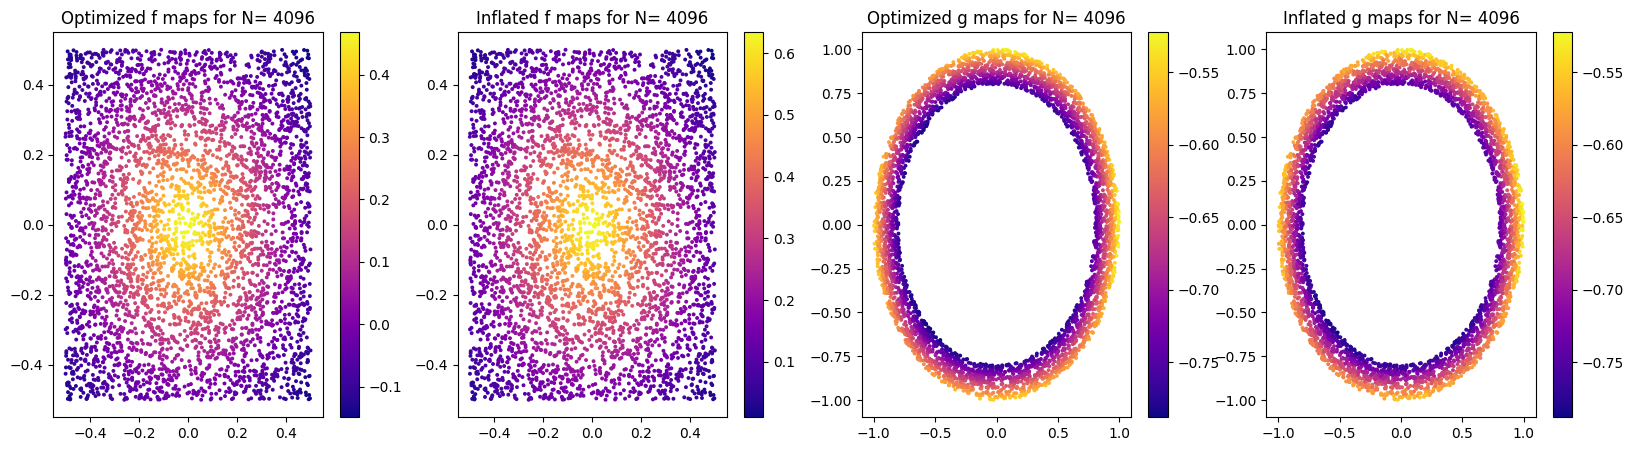

In [19]:
from locale import MON_1


for i in range(0,len(N)-1):
  print("\n")
  fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=4)

  dot_scale = 2*2**(len(N) - i)

  xi,yi=x[i+1].T,y[i+1].T

  f   = multiscale_f[i+1][:,0]
  m1  = f.mean()
  im1 = plotp(ax[0], xi, f, scale=dot_scale, edgecolors=(0,0,0,0) )
  fig.colorbar(im1,ax=ax[0])

  f   = finflated[i][:,0]
  m2  = f.mean()
  im2 = plotp(ax[1], xi, f, scale=dot_scale, edgecolors=(0,0,0,0) )
  fig.colorbar(im2,ax=ax[1])

  g = multiscale_g[i+1][:,0]
  m3 = g.mean()
  im3=plotp(ax[2],yi, g, scale=dot_scale, edgecolors=(0,0,0,0) )
  fig.colorbar(im3,ax=ax[2])

  g  = ginflated[i][:,0]
  m4 = g.mean()
  im4=plotp(ax[3],yi, g, scale=dot_scale, edgecolors=(0,0,0,0) )
  fig.colorbar(im3,ax=ax[3])

  # print( "Stats f:")
  # print( m1 )
  # print( m2 )
  # print( m1-m2)
  # print( m1/m2)

  # print( "Stats g:")
  # print( m3 )
  # print( m4 )
  # print( m3-m4)
  # print( m3/m4)

  # print( "Mixed")
  # print( m1 + m3 )
  # print( m2 + m4 )


  ax[0].set_title("Optimized f maps for N= "+str(N[i+1]))
  ax[1].set_title("Inflated f maps for N= "+str(N[i+1]))

  ax[2].set_title("Optimized g maps for N= "+str(N[i+1]))
  ax[3].set_title("Inflated g maps for N= "+str(N[i+1]))

  # plt.axis("off")
  plt.xlim(np.min(yi[0,:])-.1,np.max(yi[0,:])+.1)
  plt.ylim(np.min(yi[1,:])-.1,np.max(yi[1,:])+.1)

  plt.show();

In [ ]:
# Comparing Sinkhorn solutions to inflated versions from coarser scale
assert( len(finflated) == len(multiscale_f)-1 )
scales_count = len(finflated)
f_error = []
g_error = []
for i in range( scales_count ):
  solution = multiscale_f[i+1]
  coarse   = finflated[i]
  f_error.append( np.linalg.norm( solution - coarse)/len(solution) )
  solution = multiscale_g[i+1]
  coarse   = ginflated[i]
  g_error.append( np.linalg.norm( solution - coarse)/len(solution) )

# Plotting
plt.figure( figsize=(5,5) )
plt.plot( range(scales_count), f_error,'-bD', label='Errors for f' )
plt.plot( range(scales_count), g_error, '-rD',label='Errors for g' )
plt.xlabel( 'Scale ')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (20,7))
plt.title("Time Plot")
plt.plot(list(range(1,len(times_Sinkhorn)+1)),times_Sinkhorn, '-gD' )

# plt.yscale( 'log')
plt.ylabel("Time in second")
plt.xlabel("Dimensions of samples drawn")
plt.xticks(list(range(1,len(times_Sinkhorn)+1)),[str(i) for i in N])
plt.legend(["Sinkhorn"],loc="upper left")
plt.show()